<center><h1><font color="blue">Algorithme de Prédiction de la Qualité du Vin</font></h1></center>

### 1. Importation des bibliothèques :

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### 2. Lecture des données :

In [2]:
data = pd.read_csv ("winequality-red.csv")
data.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Analye exploratoire :

In [3]:
print ("Dimension des données :", data.shape)

Dimension des données : (1599, 12)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Axes(0.22375,0.11;0.5775x0.77)


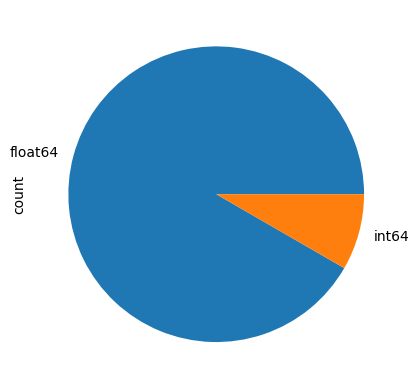

In [4]:
print (data.dtypes)
print (data.dtypes.value_counts ().plot.pie ())

In [5]:
(data.isna ().sum () / data.shape [0]).sort_values

<bound method Series.sort_values of fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64>

#### Statistiques descriptives des différentes variables :

In [6]:
print("Statistiques descriptives :\n")
data.describe()

Statistiques descriptives :



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Récaputilatif :
#### 3.1 Variable à prédire (variable cible ou target varable) : _quality_
#### 3.2 Dimensions :
    - Nombre de lignes : 1599
    - Nombre de colones : 12
#### 3.3 Type des variables :
    - features (fixed acidity, volatile acidity, ...) : float
    - target (quality) : int
#### 3.4 Valeurs manquantes :
    - aucune
    Il n'y a aucune valeur NaN donc pas besoin de faire du nettoyage de données.

#### Distribution de la variable cible : _quality_

In [7]:
print("Distribution de la variable cible :\n")
data['quality'].value_counts()

Distribution de la variable cible :



quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### 4. Visualisation des données dans leur état initial :

/tmp/ipykernel_18717/2162373453.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist (ax = ax, layout = (3, 4), alpha = 0.5, label = 'x', color = 'blue')


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

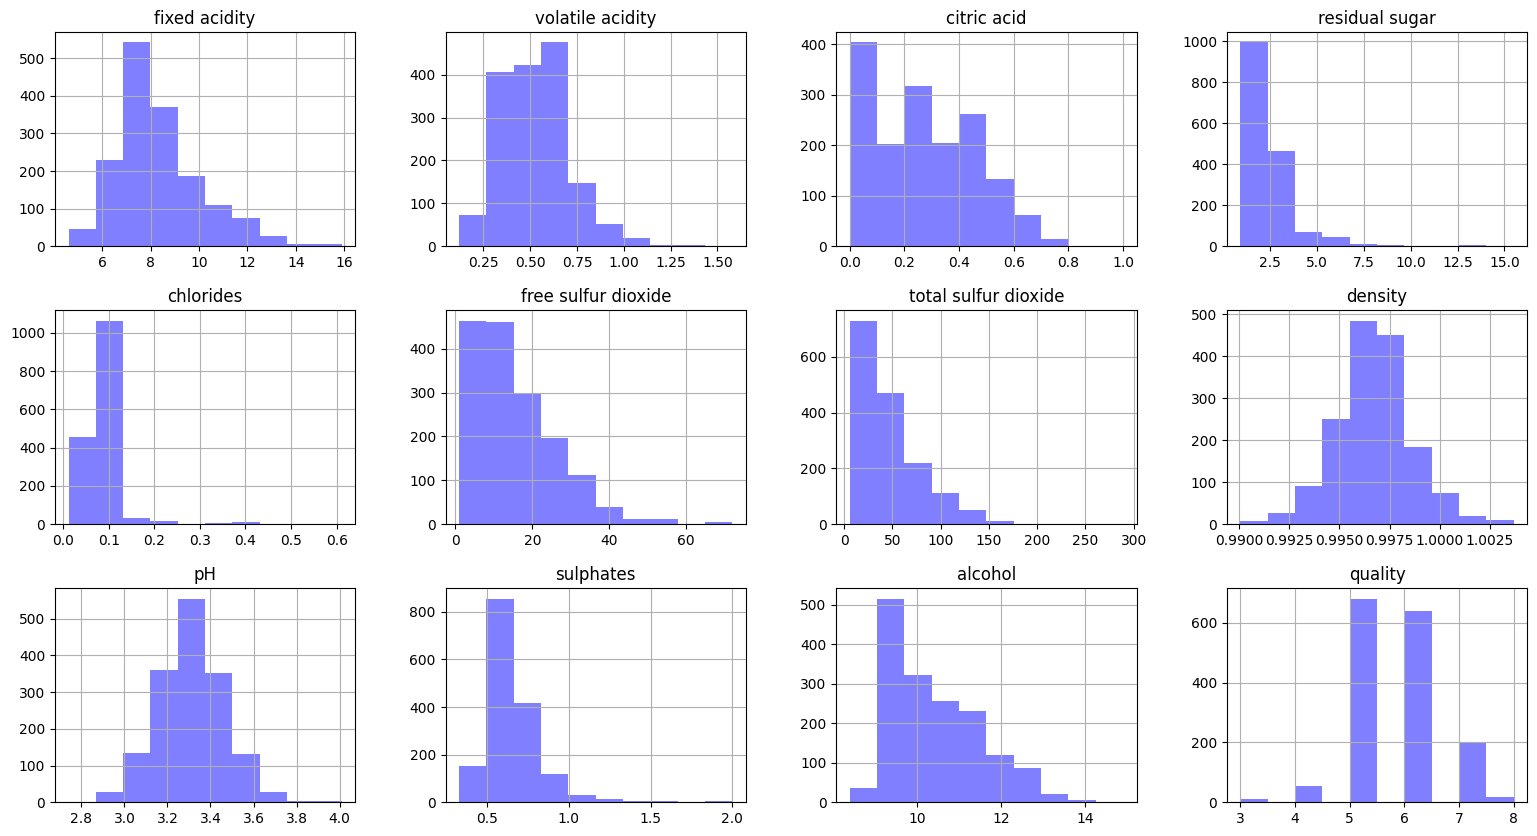

In [8]:
fig, ax = plt.subplots (figsize = (19, 10))
data.hist (ax = ax, layout = (3, 4), alpha = 0.5, label = 'x', color = 'blue')

### 5. Traitement des Valeurs abbérrantes
Pour le traitement des valeurs abbérrantes, nous allons normaliser les données.

#### Matrice de corrélation :

In [9]:
correlation_matrix = data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Normailsation :

In [10]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
data[features] = (data[features] - data[features].mean()) / data[features].std()

In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,5
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,5
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,6
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,5
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,6
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,6
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,5


#### Encodage du target : _quality_

Considérons ce qui suit :
* si quality est supérieur ou égal à six, l'occurence du vin est de la bonne qualité soit 1;
* sinon, elle est de mauvaise qualité soit 0;

In [12]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

### 6. Entrainement du modèle

#### Séparation des données
On recupère les features dans une variable X et le target (variable à prédire) dans une variable Y.

In [13]:
X = data.drop('quality', axis=1)
Y = data['quality']

#### Diviser le dataset 
On divise le dataset en des ensembles d'entraînement et de test.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
print ("Dimensions de X_train :", X_train.shape)
print ("Dimensions de X_train :", X_test.shape)
print ("Dimensions de X_train :", Y_train.shape)
print ("Dimensions de X_train :", Y_test.shape)

Dimensions de X_train : (1279, 11)
Dimensions de X_train : (320, 11)
Dimensions de X_train : (1279,)
Dimensions de X_train : (320,)


#### Choix et entrainement du modèle
Notre choix de modèle se porte d'abord sur la régression logistique. Pour ce faire, nous allons créer une instance du modèle ```LogisticRegression``` de la bibliothèque scikit-learn précisement dans le module ```linear_model```. On entraînera ce modèle via la méthode ```fit ()```.

In [22]:
# Modèle LogisticRegression : model
model = LogisticRegression ()

In [23]:
# Entraînement du modèle :
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# Prédiction de la qualité du vin (de la variable quality) : Y_pred
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

#### Matrice de confusion :

In [33]:
cf_matrix = confusion_matrix(Y_test, Y_pred)

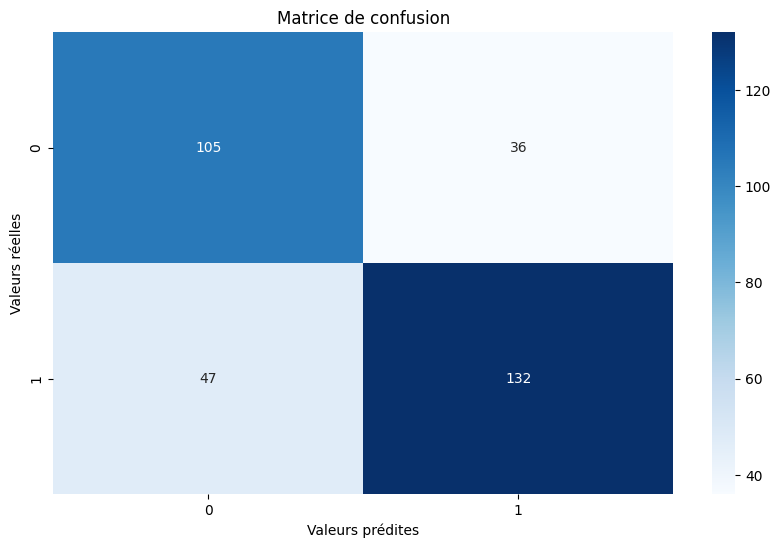

In [34]:
plt.figure (figsize = (10, 6))
plt.title ("Matrice de confusion")
sns.heatmap (cf_matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.ylabel ("Valeurs réelles")
plt.xlabel ("Valeurs prédites")
plt.show ()

#### Evaluation du modèle :

In [41]:
print("La précision du modèle est de :", accuracy_score(Y_test, Y_pred)*100, '%')

La précision du modèle est de : 74.0625 %


In [42]:
print("Rapport de classification : \n", classification_report(Y_test, Y_pred))

Rapport de classification : 
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

